In [1]:
!git clone https://github.com/ElHaban3ro/GToolA
import zipfile
dataset_export = zipfile.ZipFile('/content/GToolA/Images_samples.zip') # Load zip file.
dataset_export.extractall('/content/')

Cloning into 'GToolA'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 24 (delta 5), reused 24 (delta 5), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [2]:
#TODO: Preparar dataset
import os 
from PIL import Image
import numpy as np


train_files = os.listdir('/content/Train')
train_x = [] # Imagenes
train_y = [] # Labels

for image_t in train_files:
  img = Image.open(f'/content/Train/{image_t}').resize((50, 50)).convert('L') # Esto se puede 
  # variar para obtener mayor resolución para las imagenes de entrenamiento y validación. 'L'
  

  if 'alt' in image_t:
    img_a = train_x.append(np.asarray(img))
    train_y.append(0) # Las etiquetas consisten en numeros. Las Redes no entienden de letras.

  elif 'y' in image_t[0]:
    img_a = train_x.append(np.asarray(img))
    train_y.append(1)

  elif 'n' in image_t[0]:
    img_a = train_x.append(np.asarray(img))
    train_y.append(2)

  elif 'h' in image_t[0]:
    img_a = train_x.append(np.asarray(img))
    train_y.append(3)

In [3]:
train_data = (train_x, np.array(train_y)) # Tupla con datos las imagenes como array y sus etiquetas.

In [4]:
val_files = os.listdir('/content/Validation')
val_x = [] # Imagenes
val_y = [] # Labels

for image_v in val_files:
  img = Image.open(f'/content/Validation/{image_v}').resize((50, 50)).convert('L') # Esto se puede 
  # variar para obtener mayor resolución para las imagenes de entrenamiento y validación.


  if 'alt' in image_t:
    img_a = val_x.append(np.asarray(img))
    val_y.append(0)

  elif 'y' in image_t[0]:
    img_a = val_x.append(np.asarray(img))
    val_y.append(1)

  elif 'n' in image_t[0]:
    img_a = val_x.append(np.asarray(img))
    val_y.append(2)

  elif 'h' in image_t[0]:
    img_a = val_x.append(np.asarray(img))
    val_y.append(3)

In [5]:
val_data = (val_x, np.array(val_y))

In [6]:
# Normalización de los datos.
import tensorflow as tf


def normalization(images, labels):
  images = tf.cast(images, tf.float32) # Esto genera un nuevo array con forma extraña xd.
  # La matriz pasa de estar separadas por coma, a cada fila estar unida y separada por puntos.
  images /= 255 # 255 es los valores de los pixeles. Básicamente

  return images, labels # No operamos las etiquetas pero igualmente queremos que
  # al pasar esta función nos devuelva una tupla.


  print(images)

In [7]:
t_data = normalization(train_data[0], train_data[1])
v_data = normalization(val_data[0], val_data[1])

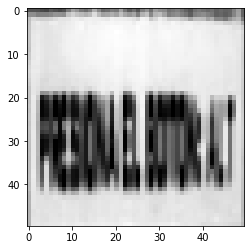

In [8]:
import matplotlib.pyplot as plt


for train_image in t_data[0]:
  plt.imshow(train_image, cmap='binary') # Descomentar si es necesario.
  plt.show() # Descomentar si es necesario.
  break

In [9]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (50, 50, 1)), # La capa flatten transforma la matriz en una matriz de una dimensión.
    tf.keras.layers.Dense(50, activation = tf.nn.relu), # Capa densa de 50 neuronas y 
    # activación relu. Intentar cambiar la activación?? Las neuronas????
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(4, activation = tf.nn.softmax), # Capa con 4 salidas, para 
    # las predicciones y activación softmax, que a lo que nos ayuda es a obtener una sola predicción.
    # La red se estaría decidiendo solo por una etiqueta.
])

In [10]:
# Model compilation

model.compile(
    
    optimizer = 'adam', # Variar esto puede suponer mejora.
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Funció de perdida. Este es un estandar pero puede variar.
    metrics = ['accuracy']

)

In [15]:
# LOTE_SIZE = 32 # Usar lotes??? Son muy pocos ejemplos.

history = model.fit(x=t_data[0], y=t_data[1], epochs = 42, validation_data = (v_data[0], v_data[1])) # Las epocas SON variables para un mejor resultado.

Epoch 1/42
5/5 [==============================] - 0s 40ms/step - loss: 0.3912 - accuracy: 0.8392 - val_loss: 3.3426 - val_accuracy: 0.2188
Epoch 2/42
5/5 [==============================] - 0s 16ms/step - loss: 0.3799 - accuracy: 0.8881 - val_loss: 4.6594 - val_accuracy: 0.0000e+00
Epoch 3/42
5/5 [==============================] - 0s 20ms/step - loss: 0.4611 - accuracy: 0.8112 - val_loss: 2.5399 - val_accuracy: 0.3125
Epoch 4/42
5/5 [==============================] - 0s 24ms/step - loss: 0.3938 - accuracy: 0.8182 - val_loss: 4.0278 - val_accuracy: 0.0938
Epoch 5/42
5/5 [==============================] - 0s 21ms/step - loss: 0.3291 - accuracy: 0.9161 - val_loss: 2.8966 - val_accuracy: 0.1250
Epoch 6/42
5/5 [==============================] - 0s 27ms/step - loss: 0.3736 - accuracy: 0.9021 - val_loss: 4.1502 - val_accuracy: 0.0625
Epoch 7/42
5/5 [==============================] - 0s 31ms/step - loss: 0.3575 - accuracy: 0.8811 - val_loss: 2.5996 - val_accuracy: 0.3438
Epoch 8/42
5/5 [=======

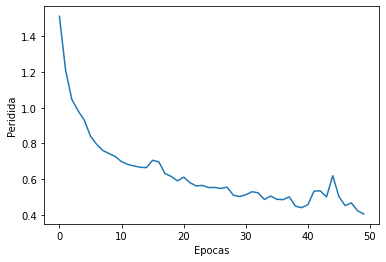

In [12]:
plt.xlabel('Epocas')
plt.ylabel('Peridida')
plt.plot(history.history['loss'])

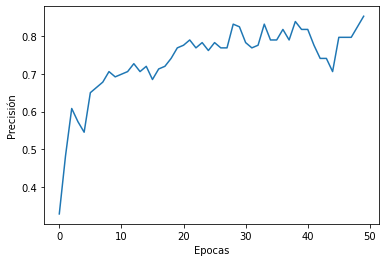

In [13]:
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.plot(history.history['accuracy'])

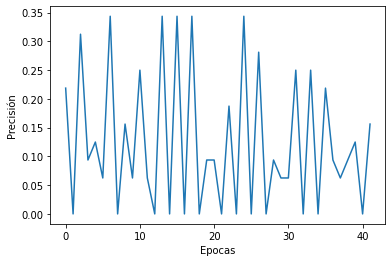

In [16]:
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.plot(history.history['val_accuracy'])